<a href="https://colab.research.google.com/github/Vidiii/Python_Projects/blob/main/Object__recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT THE REQUIRED

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras

LOADING AND SPLITTINF DATA

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print("Training Images: {}".format(X_train.shape))
print("Testing Images: {}".format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


[0]


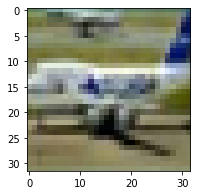

[3]


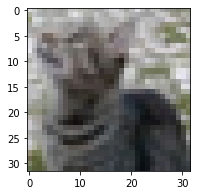

[3]


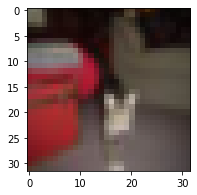

[2]


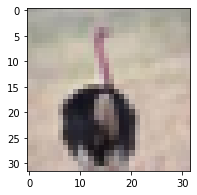

In [ ]:
for i in range(332, 336):
  #plt.subplot(120+ 1 + i)
  plt.figure(figsize=(3,3))
  img = X_train[i]
  plt.imshow(img)
  print(y_train[i])
  plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test=X_test/255
n_classes = 10

In [ ]:
print("Shape before one-hot encoding: ",y_train.shape)
Y_train = np_utils.to_categorical(y_test, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ",Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (10000, 10)


BUILDING THE MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolution layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=200, epochs=3)
#model.evaluate(x_test, y_test)

Epoch 1/3
250/250 [==============================] - 480s 2s/step - loss: 1.1297 - accuracy: 0.5987
Epoch 2/3
250/250 [==============================] - 473s 2s/step - loss: 0.9311 - accuracy: 0.6724
Epoch 3/3
250/250 [==============================] - 472s 2s/step - loss: 0.8039 - accuracy: 0.7194


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 27s 85ms/step - loss: 0.7524 - accuracy: 0.7385


[0.7524011731147766, 0.7384999990463257]

PREDICTING

In [ ]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

class_labels = dict(zip(classes, names))

#generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

#make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 128ms/step


In [ ]:
print(predictions)

[[1.95989525e-03 9.74072100e-05 4.17027622e-02 4.23099697e-02
  4.77049440e-01 1.20595962e-01 3.94750433e-03 3.11331868e-01
  5.78023028e-04 4.27020772e-04]
 [4.71829344e-03 7.93822168e-04 7.61582404e-02 1.69831038e-01
  9.65449065e-02 3.93892199e-01 6.21810257e-02 1.85034603e-01
  5.59447519e-03 5.25143510e-03]
 [2.89703719e-04 1.37915323e-03 1.71218421e-02 3.72965224e-02
  2.81630037e-03 1.07607357e-02 9.27139938e-01 1.24862965e-03
  1.00374955e-03 9.43358697e-04]
 [2.69734184e-04 7.28189552e-05 1.74161512e-02 6.99184060e-01
  1.37011753e-02 1.57961100e-01 1.05630904e-01 4.76009957e-03
  1.76606249e-04 8.27386801e-04]
 [1.52111155e-04 9.82551277e-01 1.74422712e-06 1.84388807e-06
  6.74802436e-07 9.02887223e-07 1.29542593e-06 4.81695565e-07
  5.67987910e-04 1.67216528e-02]
 [1.57277245e-04 9.99207079e-01 1.45947058e-06 8.39822007e-07
  5.47800383e-08 4.87094383e-07 9.39740119e-07 1.18440768e-08
  1.17910306e-04 5.14027721e-04]
 [1.16975807e-01 2.68051885e-02 1.71081930e-01 1.90834194e

In [ ]:
for image in predictions:
  print(np.sum(image))

0.9999999
1.0
0.99999994
1.0000001
0.99999994
1.0000001
1.0
1.0
0.99999994


In [ ]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 5 6 8]


FINAL OBJECT DETECTION

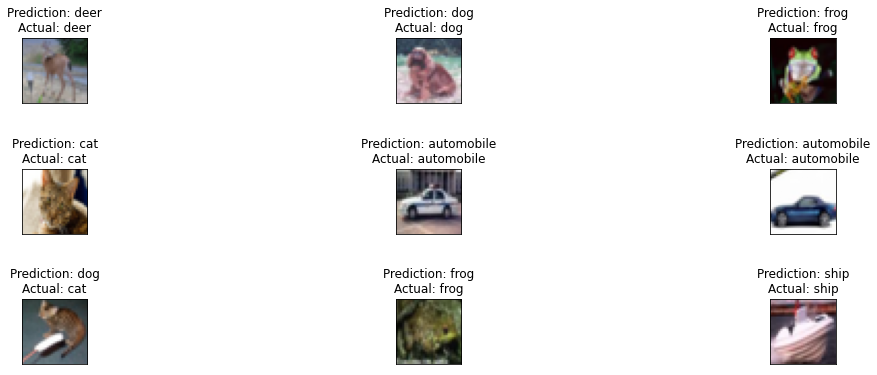

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = "Prediction: {}\nActual: {}".format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #plot the image
  axs[i].imshow(img)

#show the plot
plt.show()